In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [49]:
df=pd.read_csv('state_violence.csv')
df

,State,Date,Count
0,Karnataka,2021-01,3
1,Karnataka,2021-02,5
2,Karnataka,2021-03,5
3,Karnataka,2021-04,4
4,Karnataka,2021-05,0
...,...,...,...
139,Haryana,2018-08,0
140,Haryana,2018-09,0
141,Haryana,2018-10,0
142,Haryana,2018-11,0


In [6]:
%%R

df <- read_csv('state_violence.csv')

Rows: 144 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): State, Date
dbl (1): Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [163]:
#save this data to a csv
df6.to_csv('data/us_covid.csv', index=False)

Rows: 48 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): State, Date
dbl (1): Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


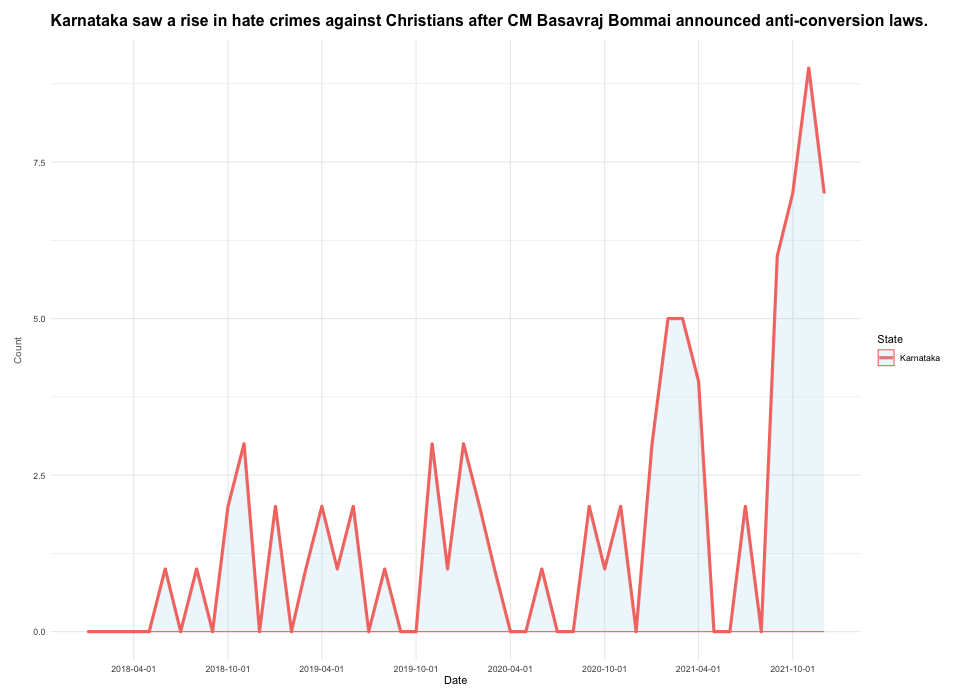

In [39]:
%%R -w 960 -h 700

library(MASS)
library(scales)
library(tidyquant)

df <- read_csv('Karnataka.csv')
df$Date <- as.Date(paste0(df$Date, "-01"))


ggplot(df, aes(x = Date, y = Count, group = State, color = State)) + 
  geom_line(size=1.5) +
  geom_ribbon(aes(ymin = 0, ymax = Count), fill = "lightblue", alpha = 0.2) +
  labs(title = "Karnataka saw a rise in hate crimes against Christians after CM Basavraj Bommai announced anti-conversion laws.", x = "Date", y = "Count") +
  scale_x_date(date_labels = "%Y-%m-%d", date_breaks = "6 months") +
  theme_minimal() +
    theme(
    panel.grid.minor.x = element_blank(),
    plot.title = element_text(face = "bold", size = 16, color = "black", margin = margin(b = 11)),
    plot.subtitle = element_text(size = 12, color = "gray40"),
    plot.caption = element_text(hjust = 0, size = 10, color = "gray40"),
    axis.title.y = element_text(size = 10, color = "gray40", margin = margin(r = 10)),
    plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm"))

`geom_smooth()` using formula = 'y ~ x'


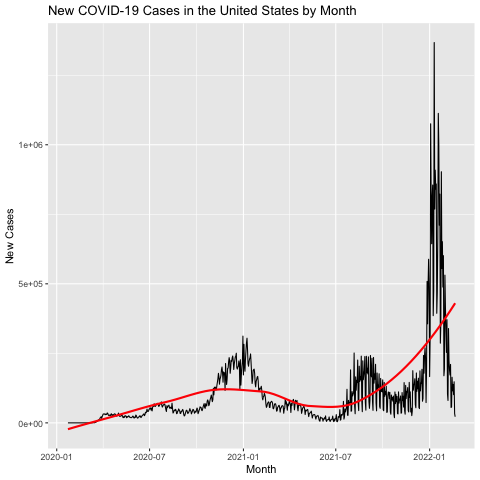

In [174]:
%%R
library(ggplot2)
library(lubridate)

ggplot(df6, aes(x = date, y = new_cases)) + 
  geom_line() +
  stat_smooth(method = "loess", se = FALSE, color = "red") +
  labs(title = "New COVID-19 Cases in the United States by Month", x = "Month", y = "New Cases")
